ANN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing dataset
dataset= pd.read_csv('Churn_Modelling.csv')
X= dataset.iloc[:, 3:13]
y= dataset.iloc[:, 13]

In [4]:
# Create dummy variables
geography= pd.get_dummies(X["Geography"], drop_first= True)
gender= pd.get_dummies(X["Gender"], drop_first= True)

# Concatenate
X= pd.concat([X, geography, gender], axis= 1)

# Drop unnecessary columns
X= X.drop(["Geography", "Gender"], axis=1)

In [5]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

Now let's make ANN

In [8]:
# importing keras libraries and packagess
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [9]:
# Initialize the ANN
classifier= Sequential()

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform', activation= 'relu',  input_shape=(11,))) # 6= no of nodes in 1st hidden layer, 11= no of indepent variables/inputs


In [15]:
# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform', activation= 'relu'))

In [16]:
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation= 'sigmoid'))

In [18]:
# Completing the ANN
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [19]:
# Fitting the ANN to the Training set
model_history= classifier.fit(X_train, y_train, validation_split= 0.33, batch_size= 10, epochs= 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7127 - loss: 0.6064 - val_accuracy: 0.8020 - val_loss: 0.4817
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4758 - val_accuracy: 0.8012 - val_loss: 0.4685
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8076 - loss: 0.4482 - val_accuracy: 0.8023 - val_loss: 0.4603
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8079 - loss: 0.4430 - val_accuracy: 0.8035 - val_loss: 0.4497
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.4394 - val_accuracy: 0.8069 - val_loss: 0.4377
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.4266 - val_accuracy: 0.8167 - val_loss: 0.4176
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8328 - loss: 0.3914 - val_accuracy: 0.8281 - val_loss: 0.3968
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8433 - loss: 0.3693 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


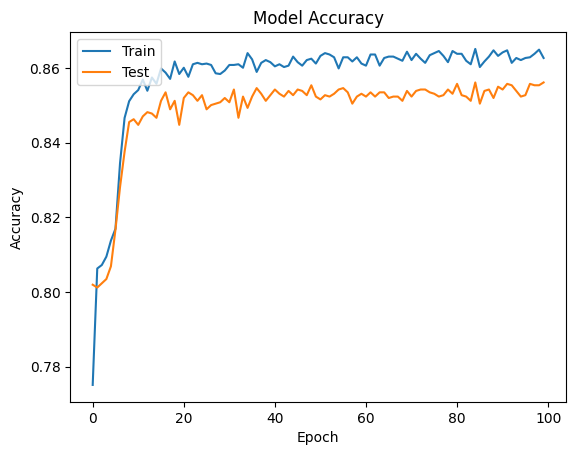

In [21]:
# Print the keys of the training history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


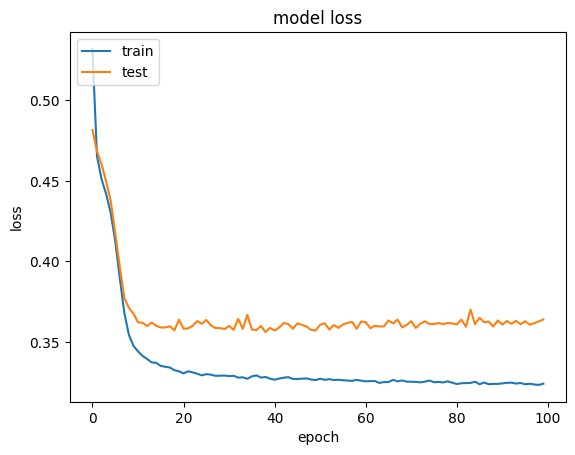

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 Making Predictions and Evalauting the Models



In [23]:
# Predicting the Test set results
y_pred= classifier.predict(X_test)
y_pred= (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1470,  125],
       [ 178,  227]])

In [26]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
score

0.8485